# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

Let's start with importing the libraries and moving the csv into pandas dataframe

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns
from scipy.stats import norm
import scipy.stats as stats
import math

In [2]:
# let's store the dataframe as df
df = pd.read_csv('data/human_body_temperature.csv')

In [3]:
# top rows
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [5]:
# All good, no values are missing
df.isnull().sum()

temperature    0
gender         0
heart_rate     0
dtype: int64

In [6]:
# some statistics
df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


### *1. The distribution of body temperatures follows the Normal distribution's Bell Curve*

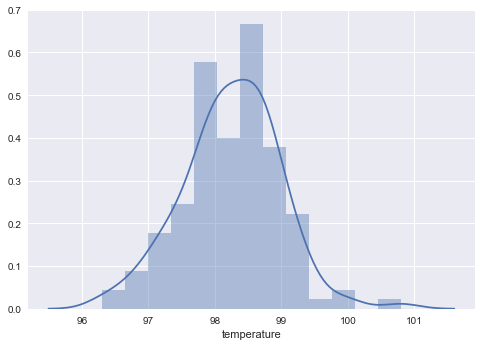

In [9]:
# Distplot for temperature using seaborn
x = df.temperature
sns.distplot(x)
plt.show();

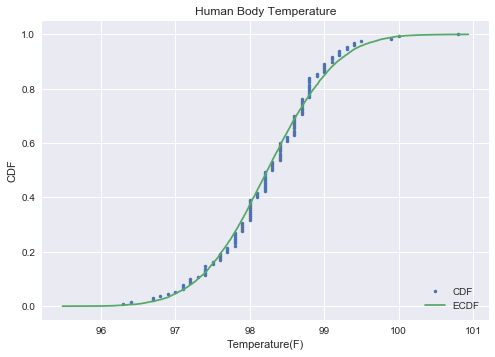

In [38]:
# Plots the ECDF and CDF of the human body temperatures
def ecdf(data):
    """
    Compute ECDF for a one-dimensional array of measurements.
    Returns tuple of arrays (x,y) that contain x and y values for ECDF.
    """
    x = np.sort(data)
    y = np.arange(1, len(x) + 1) / len(x)
    
    return x, y

x_ecdf, y_ecdf = ecdf(df['temperature'])

temperature_theoretical = np.random.normal(np.mean(df['temperature']), np.std(df['temperature']), size=10000)

x_theoretical_cdf, y_theoretical_cdf = ecdf(temperature_theoretical)

plt.plot(x_ecdf, y_ecdf, marker='.', linestyle='none')
plt.plot(x_theoretical_cdf, y_theoretical_cdf)
plt.xlabel('Temperature(F)')
plt.ylabel('CDF')
plt.title('Human Body Temperature')
plt.legend(('CDF', 'ECDF'), loc='lower right')
plt.show()

### *2. Yes, the sample size is large since it has 130 observations which is greater than the usual 30. Yes all observations are independent since the effect of one does not affect the other.*

In [10]:
df.shape

(130, 3)

### *3. A one sample t test is advisable to use here since we have only one set of data that will be validated against the mean. In our case it is better to use the z statistic because the sample size is large. By trying a t-test the result did not much differ.*

Hypothesis Testing in which the Null Hypothesis means the sample and true mean are the same and the alternate hypothesis says
they are not.

$H_0$: The mean of the sample and the true mean of 98.6 are the same. $\mu=\mu_0$

$H_A$: The means are different. $\mu\neq\mu_0$

In [13]:
# p value using 100000 boostrap replicates
bootstrap_replicates = np.empty(100000)

size = len(bootstrap_replicates)

for i in range(size):
    bootstrap_sample = np.random.choice(df['temperature'], size=len(df['temperature']))
    bootstrap_replicates[i] = np.mean(bootstrap_sample)

p = np.sum(bootstrap_replicates >= 98.6) / len(bootstrap_replicates)
print('p =', p)

p = 0.0


**The p value is extremely small even after 100000 replicates which means the null hypothesis is false, which inturn means that
the true population mean is not equal to 98.6**

In [18]:
# z test
z = (np.mean(df['temperature']) - 98.6) / (np.std(df['temperature']) / np.sqrt(len(df['temperature'])))
print('z =', z)

p_z = stats.norm.sf(abs(z))*2
print('p = p(z >= 5.476) + p(z <= -5.476) =', p_z)

z = -5.47592520208
p = p(z >= 5.476) + p(z <= -5.476) = 4.35231516588e-08


In [20]:
# t test
t = z
print('t =', t)

p_t = stats.t.sf(np.abs(t), len(df['temperature'])-1)*2
print('p = p(t >= 5.476) + p(t <= -5.476) =', p_t)

t = -5.47592520208
p = p(t >= 5.476) + p(t <= -5.476) = 2.18874646241e-07


### *4. The t test is the best to use for small sample size as the below t and z tests have a huge difference in the p value with z test totally performing bad. So t is the best.*

In [22]:
# Draws random sample of 10
sample = np.random.choice(df['temperature'], size=10)

sample

array([ 98.6,  96.7,  98.2,  99. ,  97.8,  97.4,  98.6,  99.2,  98.6,  97.1])

In [32]:
# Performs t test
t2 = (np.mean(sample) - 98.6) / (np.std(sample) / np.sqrt(len(sample)))

print('t =', t2)

p_t2 = stats.t.sf(np.abs(t), len(sample)-1)*2
print('p = ', p_t2)

t = -1.90994198971
p =  0.000392231622671


In [33]:
# Performs z test
z2 = (np.mean(sample) - 98.6) / (np.std(sample) / np.sqrt(len(sample)))

print('z =', z2)

p_z2 = stats.norm.sf(abs(z))*2
print('p =', p_z2)

z = -1.90994198971
p = 4.35231516588e-08


### *5. When the temperature doesnt lie between our 95% confidence interval i.e the computed range (96.7225 - 99.4775) then they have a abnormal body temperature*

In [34]:
# Calculates margin of error for sample mean with 95% confidence

print('The mean temperature of the data is', np.mean(df['temperature']))

z = 1.96 # this is the value of z for 95% confidence

error = z * np.std(df['temperature']) / np.sqrt(len(df['temperature']))

print('margin of error for a sample mean =', error)

The mean temperature of the data is 98.24923076923078
margin of error for a sample mean = 0.125550964803


Okay let's calculate the 95% confidence interval range below

In [36]:
# Calculates 95% confidence interval
confidence_interval = np.percentile(df['temperature'], [2.5, 97.5])

print('We expect 95% of the temperature data to be between', confidence_interval[0], 'and', confidence_interval[1])

We expect 95% of the temperature data to be between 96.7225 and 99.4775


### *6. A two-sample permutation test with the differences in means will be appropriate for this problem.A permuatation test is appropriate for this because we will be testing whether males and females have the same distribution and similar mean temperatures.*

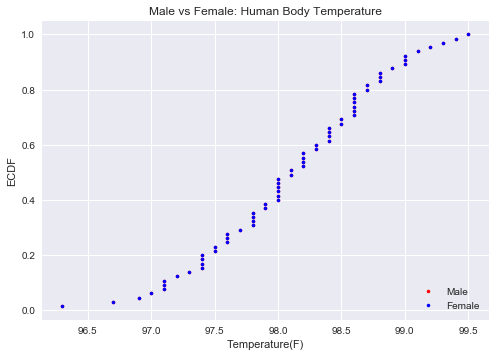

The difference between the male and female mean temperatures is 0.289230769231


In [39]:
# Plots the ECDF for the temperatures of males and females

male_temperature = df[df['gender'] == 'M']['temperature']
female_temperature = df[df['gender'] == 'F']['temperature']

x_male, y_male = ecdf(male_temperature)
x_female, y_female = ecdf(female_temperature)

plt.plot(x_male, y_male, marker='.', linestyle='none', color='red')
plt.plot(x_male, y_male, marker='.', linestyle='none', color='blue')
plt.xlabel('Temperature(F)')
plt.ylabel('ECDF')
plt.legend(('Male', 'Female'), loc='lower right')
plt.title('Male vs Female: Human Body Temperature')
plt.show()

male_and_female_diff = np.abs(np.mean(male_temperature) - np.mean(female_temperature))
print('The difference between the male and female mean temperatures is', male_and_female_diff)

$H_0$: There is no difference in the distribution and means of males and females.

$H_A$: There is a difference in the distribution and means of males and females.

In [40]:
permutation_replicates = np.empty(100000)

size = len(permutation_replicates)

for i in range(size):
    combined_perm_temperatures = np.random.permutation(np.concatenate((male_temperature, female_temperature)))

    male_permutation = combined_perm_temperatures[:len(male_temperature)]
    female_permutation = combined_perm_temperatures[len(male_temperature):]

    permutation_replicates[i] = np.abs(np.mean(male_permutation) - np.mean(female_permutation))
    
p_val = np.sum(permutation_replicates >= male_and_female_diff) / len(permutation_replicates)

print('p =', p_val)

p = 0.02409


The p value is less than 0.05 so we can reject the null hypothesis which means that 

**There is a there is a difference in the distribution of male and female temperatures**

### CONCLUSION

The mean normal body temperature taught to us was 98.6 F or 36.9 C and after our analysis we can say that it is not all true and
our analysis says that it lies between 96.7225 and 99.4775 also the male and female human body temperatures are significantly
different. And it is ideal to use a t test for a sample size less than 30 and z for larger samples